<a href="https://colab.research.google.com/github/cccg8105/AspNetCore.Docs/blob/master/Frecuencia%20inscripciones/Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de la frecuencia de inscripciones



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
# carga de archivo
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/cccg8105/notebook_AD/master/Frecuencia%20inscripciones/data/conversionesPE.csv", index_col=0)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
raw_csv_data.head()

,FechaConsultora,FuenteIngreso,cantidad,Pais
1,26/08/19,MovilGZ,33,Perú
2,10/03/19,CALL CENTER,1,Perú
3,04/11/19,MovilGZ,30,Perú
4,13/02/19,UB,31,Perú
5,04/11/19,CALL CENTER,4,Perú


In [3]:
raw_csv_data.describe()

,cantidad
count,3846.000000
mean,88.921477
std,162.569807
min,1.000000
25%,3.000000
50%,18.000000
75%,54.750000
max,922.000000


## Transformación y formateo de datos
 

In [163]:
# Transformacion de datos para analisis temporal
df = raw_csv_data.copy()
df=df[df.FuenteIngreso == "UB"]
df['Fecha'] = pd.to_datetime(raw_csv_data.FechaConsultora, dayfirst = True)
df['inscripciones'] = df.cantidad
del df['FuenteIngreso']
del df['Pais']
del df['FechaConsultora']
del df['cantidad']
# se agrupa y se reindexa el dataframe
df = df.groupby(['Fecha']).sum().reset_index()
df.set_index('Fecha', inplace=True, verify_integrity=True)
# establecer frecuencia
df.sort_index().asfreq(freq='d')
df.head()



,inscripciones
Fecha,
2018-01-02,2
2018-01-03,3
2018-01-04,4
2018-01-05,7
2018-01-06,1


## Gráfico de la serie temporal

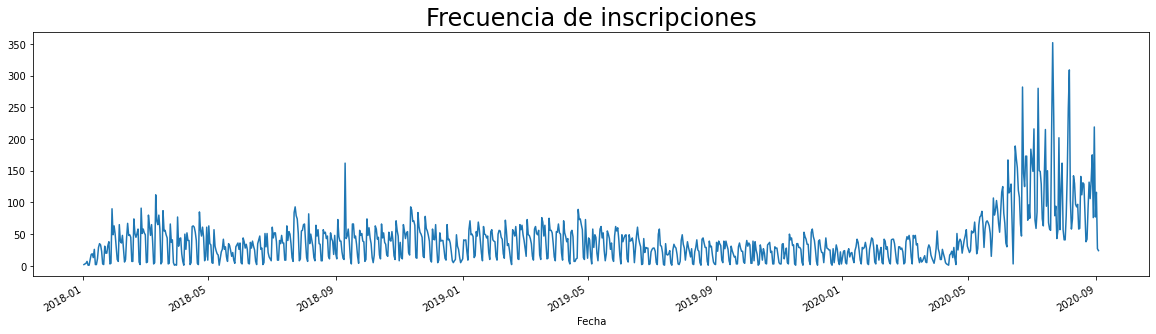

In [162]:
df.inscripciones.plot(figsize = (20,5))
plt.title("Frecuencia de inscripciones", size= 24)
plt.show()
#df.head()

## Estacionariedad

In [164]:
sts.adfuller(df.inscripciones)

(-0.8994044296141788,
 0.7881684842751513,
 21,
 946,
 {'1%': -3.437281430175827,
  '10%': -2.5683993544869015,
  '5%': -2.8646000638781532},
 8562.578395792347)

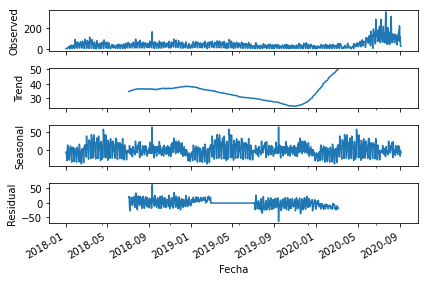

In [159]:
s_dec_additive = seasonal_decompose(df.inscripciones, "additive", freq=365)
s_dec_additive.plot()
plt.show()

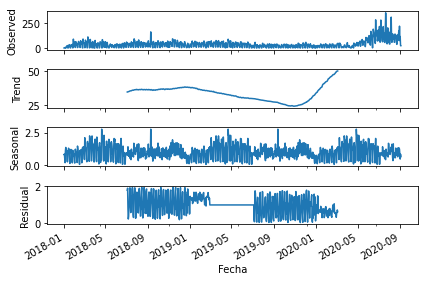

In [160]:
s_dec_additive = seasonal_decompose(df.inscripciones, "multiplicative", freq=365)
s_dec_additive.plot()
plt.show()